# Clustering - Class work

## Clustering

In [2]:
import numpy as np
import pandas as pd
import plotly_express as px

In [8]:
# Density-based Spatial Clustering of Applications with Noise (DBSCAN)
from sklearn.datasets import make_moons
data, cluster = make_moons(n_samples=200,noise=0.05,random_state=0)
df = pd.DataFrame(data=data, columns=['x','y'])

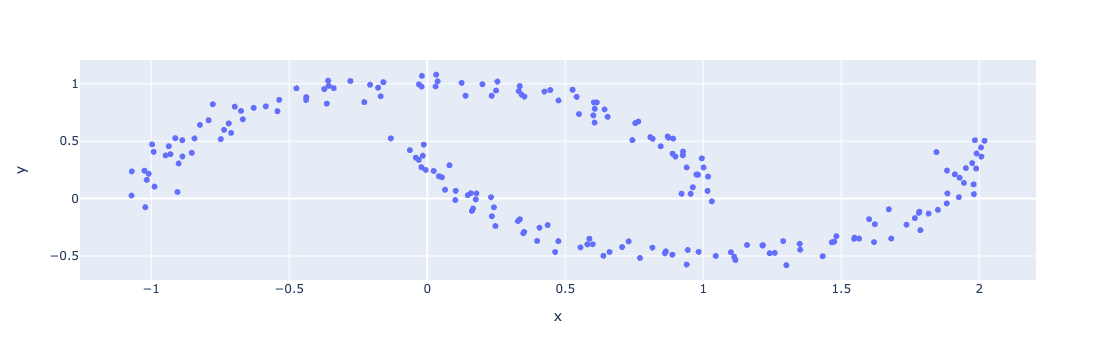

In [9]:
px.scatter(df, x='x', y='y')

Cluster the data using k-means, hierecical clustering (single and complete linkage) and plot the resulted clusters. 

## Implement an Hierarchical clustering algorithm

The psuado-code:
* Initialize each point as a standalone cluster
* Compute the distance between all relevant clusters:
  * Compute the pairwise distances between each pair of points from the different clusters (hint: use the `euclidean_distances()` function from sklearn.metrics.pairwise
  * The distance between the clusters is one point from the above collection. Which point? this is determined by the linkage function
  * stop the process at the requested number of clusters (remember - at each step you combine one cluster)
    

You can implement the above using Numpy or Pandas. With pandas it should be a little easier. For example:
* Start with a dataframe holding the points in columns `x` and `y`
* Add a column to each row (point) that marks the cluster to which the points belong to. In the beginning, init this column using `df['cluster'] = range(len(df))` thus putting each point in a cluster of its own.
* Keep track on the number of clusters using `clusters = df.cluster.unique()`
* Compute the distances between clusters using:
```python
c2c_distances = []
for c1 in clusters:
    for c2 in clusters:
        if c1 != c2:
            dist = compute_distance_between_clusters(c1, c2)
            c2c_distances.append((c1, c2, dist))
```

* The implementation of `compute_distance_between_clusters()` should use the sklearn `euclidean_distances()` function. Use `df[df.cluster==cx]` to get the data from the x cluster, and use the `.values` attribute of a dataframe to pass the numpy values to the function. The `euclidean_distances` will return a collection with all pairwise distance. 
* Choose the correct distance from the collection above, according to the desired linkage behivour
* Find the clusters with the minimal distance
* Combine the clusters by setting a new, unique, cluster id to the points in both clusters. Use `df.loc[mask, cluster]=your_cluster_values` to "combine" the points
* Stop the process if needed.

## Find the optimal parameters for DBScan clusering algorithm

Find the optimal parametrs to cluster the data using the DBScan algorithm. Run on a set of sensible `eps` and `minPt` params, and compute the goodness of clustering using your own function using SSE and n_outliers as inputs to it.